In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

data1=pd.read_csv('/content/drive/MyDrive/Hackathon/AV_loanprediction/train_ctrUa4K.csv')

In [127]:
data1=pd.read_csv('train_ctrUa4K.csv')

In [128]:
test=pd.read_csv('test_lAUu6dG.csv')

In [129]:
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [130]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [131]:
data1.shape

(614, 13)

In [132]:
test.shape

(367, 12)

### Split the train dataset int 2 parts to fit the model and test it later

In [133]:
#split data into train and test
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data1,test_size=0.2,random_state=10)

In [134]:
train_data.reset_index(drop=True,inplace=True)
test_data.reset_index(drop=True,inplace=True)

In [135]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001865,Male,Yes,1,Graduate,No,6083,4250.0,330.0,360.0,NaN,Urban,Y
1,LP001977,Male,Yes,1,Graduate,No,1625,1803.0,96.0,360.0,1.0,Urban,Y
2,LP002314,Female,No,0,Not Graduate,No,2213,0.0,66.0,360.0,1.0,Rural,Y
3,LP001868,Male,No,0,Graduate,No,2060,2209.0,134.0,360.0,1.0,Semiurban,Y
4,LP002141,Male,Yes,3+,Graduate,No,2666,2083.0,95.0,360.0,1.0,Rural,Y


In [136]:
data=train_data.copy()

In [137]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001865,Male,Yes,1,Graduate,No,6083,4250.0,330.0,360.0,NaN,Urban,Y
1,LP001977,Male,Yes,1,Graduate,No,1625,1803.0,96.0,360.0,1.0,Urban,Y
2,LP002314,Female,No,0,Not Graduate,No,2213,0.0,66.0,360.0,1.0,Rural,Y
3,LP001868,Male,No,0,Graduate,No,2060,2209.0,134.0,360.0,1.0,Semiurban,Y
4,LP002141,Male,Yes,3+,Graduate,No,2666,2083.0,95.0,360.0,1.0,Rural,Y


In [138]:
data.shape

(491, 13)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            491 non-null    object 
 1   Gender             481 non-null    object 
 2   Married            489 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          491 non-null    object 
 5   Self_Employed      463 non-null    object 
 6   ApplicantIncome    491 non-null    int64  
 7   CoapplicantIncome  491 non-null    float64
 8   LoanAmount         471 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     448 non-null    float64
 11  Property_Area      491 non-null    object 
 12  Loan_Status        491 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 50.0+ KB


We have total 13 column ,loan status is our target column,other 12 could be used as feature column
8 categorical and 5 numerical columns
credit history should be checked as it described as categorical but datatype is shown to be float

In [140]:
data.Credit_History.unique()

array([nan,  1.,  0.])

In [141]:
#As credit history is categorical collumn we need to replace 1 with yes and 0 with no
data.Credit_History.replace({1.:'Yes',0:'No'},inplace=True)

In [142]:
#Checking the replacement
data.Credit_History.unique()

array([nan, 'Yes', 'No'], dtype=object)

In [143]:
#Also we can drop loan id as its unique value
data.drop('Loan_ID',inplace=True,axis=1)

In [144]:
data.shape

(491, 12)

### Null value treatment

In [145]:
data.isnull().sum()

Gender               10
Married               2
Dependents           11
Education             0
Self_Employed        28
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     11
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [146]:
null=data.isnull().sum()[data.isnull().sum()>0]
per=null/data.shape[0]
per

Gender              0.020367
Married             0.004073
Dependents          0.022403
Self_Employed       0.057026
LoanAmount          0.040733
Loan_Amount_Term    0.022403
Credit_History      0.087576
dtype: float64

In [147]:
cat=data.select_dtypes('object').columns
cat

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [148]:
#Function to fill with mode-most frequent value
def fill_na_mode(df,col):
    most_fre=df[col].mode()[0]
    df[col].fillna(most_fre,inplace=True)
    return
#Function to fill with mean
def fill_na_mean(df,col):
    mean_value=df[col].mean()
    df[col].fillna(mean_value,inplace=True)
    return

In [149]:
for col in cat:
    fill_na_mode(data,col)

In [150]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     11
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [151]:
num=data.select_dtypes('number').columns
num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [152]:
for col in num:
    fill_na_mean(data,col)

In [153]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Data exploration

In [154]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.106049,0.563712,-0.063997
CoapplicantIncome,-0.106049,1.000000,0.188664,-0.063257
LoanAmount,0.563712,0.188664,1.000000,0.007671
Loan_Amount_Term,-0.063997,-0.063257,0.007671,1.000000


In [155]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [156]:
data.Loan_Status.value_counts(normalize=True)

Y    0.682281
N    0.317719
Name: Loan_Status, dtype: float64

Data is not imbalance as its approximately 70:30 ratio

In [157]:
pd.crosstab(data['Loan_Status'],data['Married'],margins=True,margins_name='Total')

Married,No,Yes,Total
Loan_Status,,,
N,63,93,156
Y,104,231,335
Total,167,324,491


In [158]:
pd.pivot_table(data,index='Loan_Status')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,5597.108974,1909.519231,150.821615,345.387500
Y,5577.964179,1530.241552,149.496036,343.463806


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000174CFD94948>,
      dtype=object)

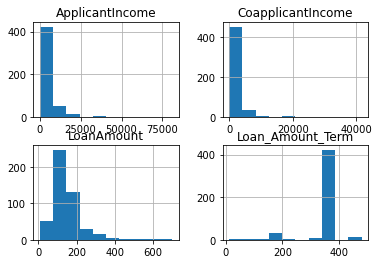

In [159]:
data.hist()

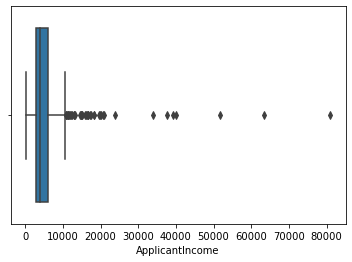

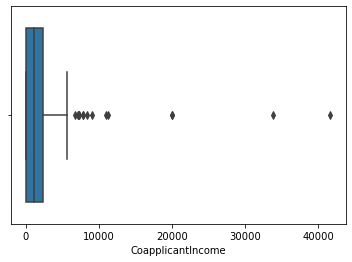

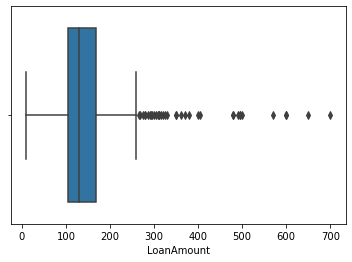

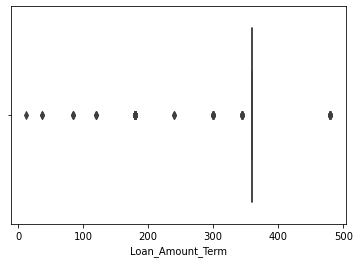

In [160]:
for col in num:
    sns.boxplot(data[col])
    plt.show()

In [161]:
data[num].skew()

ApplicantIncome      6.284967
CoapplicantIncome    7.430732
LoanAmount           2.707572
Loan_Amount_Term    -2.404011
dtype: float64

C:\Users\Samruddhi\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Samruddhi\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


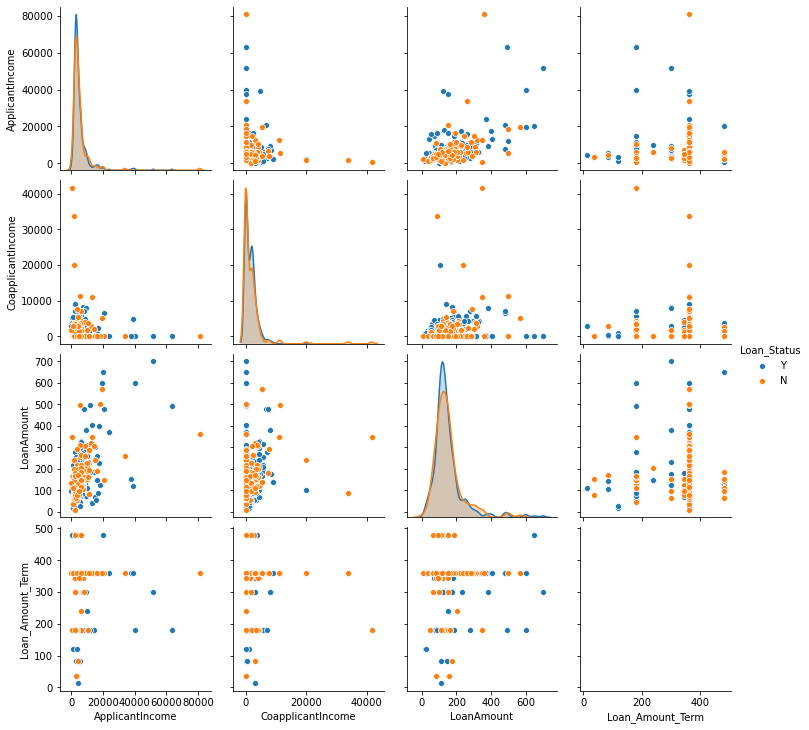

In [162]:
sns.pairplot(data,hue='Loan_Status')

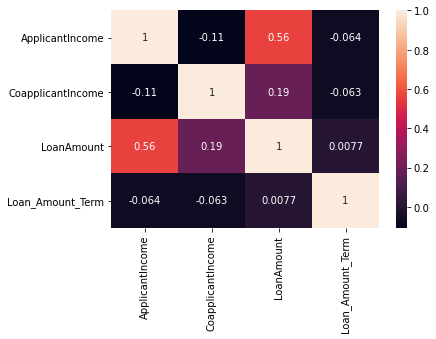

In [163]:
sns.heatmap(data.select_dtypes('number').corr(),annot=True)

In [164]:
data.select_dtypes('object').groupby(by='Loan_Status').count()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
Loan_Status,,,,,,,
N,156,156,156,156,156,156,156
Y,335,335,335,335,335,335,335


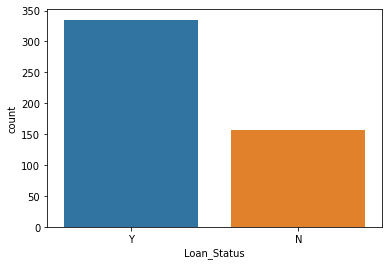

In [165]:
sns.countplot(x='Loan_Status',data=data)

In [166]:
data.Loan_Status.replace({'Y':1,'N':0},inplace=True)

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             491 non-null    object 
 1   Married            491 non-null    object 
 2   Dependents         491 non-null    object 
 3   Education          491 non-null    object 
 4   Self_Employed      491 non-null    object 
 5   ApplicantIncome    491 non-null    int64  
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         491 non-null    float64
 8   Loan_Amount_Term   491 non-null    float64
 9   Credit_History     491 non-null    object 
 10  Property_Area      491 non-null    object 
 11  Loan_Status        491 non-null    int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 46.2+ KB


In [168]:
data_en=pd.get_dummies(data,drop_first=True)

In [169]:
data_en.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_Yes,Property_Area_Semiurban,Property_Area_Urban
0,6083,4250.0,330.0,360.0,1,1,1,1,0,0,0,0,1,0,1
1,1625,1803.0,96.0,360.0,1,1,1,1,0,0,0,0,1,0,1
2,2213,0.0,66.0,360.0,1,0,0,0,0,0,1,0,1,0,0
3,2060,2209.0,134.0,360.0,1,1,0,0,0,0,0,0,1,1,0
4,2666,2083.0,95.0,360.0,1,1,1,0,0,1,0,0,1,0,0


#### split treated data into target and feature

In [170]:
inp=data_en.drop('Loan_Status',axis=1)
out=data.Loan_Status

In [171]:
inp.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_Yes,Property_Area_Semiurban,Property_Area_Urban
0,6083,4250.0,330.0,360.0,1,1,1,0,0,0,0,1,0,1
1,1625,1803.0,96.0,360.0,1,1,1,0,0,0,0,1,0,1
2,2213,0.0,66.0,360.0,0,0,0,0,0,1,0,1,0,0
3,2060,2209.0,134.0,360.0,1,0,0,0,0,0,0,1,1,0
4,2666,2083.0,95.0,360.0,1,1,0,0,1,0,0,1,0,0


In [172]:
out.value_counts()

1    335
0    156
Name: Loan_Status, dtype: int64

In [173]:
import statsmodels.api as sm

In [174]:
logistic_ols=sm.Logit(out,sm.add_constant(inp)).fit()

Optimization terminated successfully.
         Current function value: 0.443258
         Iterations 7


In [175]:
logistic_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  491
Model:                          Logit   Df Residuals:                      476
Method:                           MLE   Df Model:                           14
Date:                Sun, 10 Jan 2021   Pseudo R-squ.:                  0.2909
Time:                        18:31:22   Log-Likelihood:                -217.64
converged:                       True   LL-Null:                       -306.94
Covariance Type:            nonrobust   LLR p-value:                 1.241e-30
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.9962      0.969     -3.093      0.002      -4.895      -1.097
ApplicantIncome          8.288e-06   2.58e-05      0.321      0.748   -4.24e-05    5.89e-05
CoapplicantIncome       -5.252e-05   3.62e-05     -1.452      0.147      -0.000    1.84e-05
LoanAmount                 -0.0008      0.002     -0.480      0.631      -0.004       0.003
Loan_Amount_Term           -0.0007      0.002     -0.325      0.745      -0.005       0.003
Gender_Male                 0.0178      0.329      0.054      0.957      -0.628       0.663
Married_Yes                 0.5139      0.285      1.803      0.071      -0.045       1.072
Dependents_1               -0.3668      0.330     -1.110      0.267      -1.014       0.281
Dependents_2                0.4566      0.395      1.157      0.247      -0.317       1.230
Dependents_3+               0.1275      0.477      0.267      0.789      -0.808       1.063
Education_Not Graduate     -0.3690      0.297     -1.240      0.215      -0.952       0.214
Self_Employed_Yes          -0.0190      0.353     -0.054      0.957      -0.711       0.673
Credit_History_Yes          3.9859      0.463      8.606      0.000       3.078       4.894
Property_Area_Semiurban     1.1927      0.308      3.870      0.000       0.589       1.797
Property_Area_Urban         0.3306      0.292      1.133      0.257      -0.241       0.903
===========================================================================================
"""

In [176]:
pval=logistic_ols.pvalues
round(pval,5)

const                      0.00198
ApplicantIncome            0.74846
CoapplicantIncome          0.14663
LoanAmount                 0.63091
Loan_Amount_Term           0.74534
Gender_Male                0.95696
Married_Yes                0.07132
Dependents_1               0.26691
Dependents_2               0.24724
Dependents_3+              0.78938
Education_Not Graduate     0.21485
Self_Employed_Yes          0.95711
Credit_History_Yes         0.00000
Property_Area_Semiurban    0.00011
Property_Area_Urban        0.25733
dtype: float64

In [177]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_sc=sc.fit_transform(inp)

In [178]:
data_inp=pd.DataFrame(data_sc,columns=inp.columns)

In [179]:
data_inp.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.075399,0.825530,2.060414,0.252942,0.492989,0.717936,2.154920,-0.444478,-0.305845,-0.527869,-0.407763,0.42794,-0.797914,1.465413
1,-0.598270,0.048356,-0.616892,0.252942,0.492989,0.717936,2.154920,-0.444478,-0.305845,-0.527869,-0.407763,0.42794,-0.797914,1.465413
2,-0.509414,-0.524281,-0.960137,0.252942,-2.028444,-1.392882,-0.464054,-0.444478,-0.305845,1.894409,-0.407763,0.42794,-0.797914,-0.682401
3,-0.532535,0.177303,-0.182116,0.252942,0.492989,-1.392882,-0.464054,-0.444478,-0.305845,-0.527869,-0.407763,0.42794,1.253268,-0.682401
4,-0.440960,0.137285,-0.628334,0.252942,0.492989,0.717936,-0.464054,-0.444478,3.269629,-0.527869,-0.407763,0.42794,-0.797914,-0.682401


In [180]:
out.head()

0    1
1    1
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [181]:
len(out)

491

In [182]:
data_inp.shape

(491, 14)

In [183]:
data_cons=sm.add_constant(data_inp)

In [184]:
logistic_ols_sc=sm.Logit(out,data_cons).fit()

Optimization terminated successfully.
         Current function value: 0.443258
         Iterations 6


In [185]:
logistic_ols_sc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  491
Model:                          Logit   Df Residuals:                      476
Method:                           MLE   Df Model:                           14
Date:                Sun, 10 Jan 2021   Pseudo R-squ.:                  0.2909
Time:                        18:31:28   Log-Likelihood:                -217.64
converged:                       True   LL-Null:                       -306.94
Covariance Type:            nonrobust   LLR p-value:                 1.241e-30
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.8341      0.129      6.468      0.000       0.581       1.087
ApplicantIncome             0.0548      0.171      0.321      0.748      -0.280       0.390
CoapplicantIncome          -0.1654      0.114     -1.452      0.147      -0.389       0.058
LoanAmount                 -0.0738      0.154     -0.480      0.631      -0.375       0.227
Loan_Amount_Term           -0.0425      0.131     -0.325      0.745      -0.299       0.214
Gender_Male                 0.0070      0.131      0.054      0.957      -0.249       0.263
Married_Yes                 0.2434      0.135      1.803      0.071      -0.021       0.508
Dependents_1               -0.1401      0.126     -1.110      0.267      -0.387       0.107
Dependents_2                0.1695      0.146      1.157      0.247      -0.118       0.456
Dependents_3+               0.0357      0.134      0.267      0.789      -0.226       0.297
Education_Not Graduate     -0.1523      0.123     -1.240      0.215      -0.393       0.088
Self_Employed_Yes          -0.0066      0.123     -0.054      0.957      -0.249       0.235
Credit_History_Yes          1.4417      0.168      8.606      0.000       1.113       1.770
Property_Area_Semiurban     0.5815      0.150      3.870      0.000       0.287       0.876
Property_Area_Urban         0.1539      0.136      1.133      0.257      -0.112       0.420
===========================================================================================
"""

In [186]:
cols=data_cons.columns
cols

Index(['const', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Credit_History_Yes', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [187]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eliminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

In [188]:
result=back_feature_elem(data_cons,out,cols)

In [189]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  491
Model:                          Logit   Df Residuals:                      487
Method:                           MLE   Df Model:                            3
Date:                Sun, 10 Jan 2021   Pseudo R-squ.:                  0.2764
Time:                        18:31:29   Log-Likelihood:                -222.12
converged:                       True   LL-Null:                       -306.94
Covariance Type:            nonrobust   LLR p-value:                 1.514e-36
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.8135      0.127      6.406      0.000       0.565       1.062
Married_Yes                 0.2485      0.116      2.146      0.032       0.022       0.475
Credit_History_Yes          1.4171      0.164      8.619      0.000       1.095       1.739
Property_Area_Semiurban     0.5035      0.131      3.844      0.000       0.247       0.760
===========================================================================================
"""

In [190]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                         CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                        1.758814       2.893356    2.255853   0.000
Married_Yes                  1.021791       1.608741    1.282106   0.032
Credit_History_Yes           2.988812       5.693822    4.125259   0.000
Property_Area_Semiurban      1.279932       2.138764    1.654531   0.000


### Fit the sklearn logistic model with all columns and these three column

In [191]:
inp.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_Yes,Property_Area_Semiurban,Property_Area_Urban
0,6083,4250.0,330.0,360.0,1,1,1,0,0,0,0,1,0,1
1,1625,1803.0,96.0,360.0,1,1,1,0,0,0,0,1,0,1
2,2213,0.0,66.0,360.0,0,0,0,0,0,1,0,1,0,0
3,2060,2209.0,134.0,360.0,1,0,0,0,0,0,0,1,1,0
4,2666,2083.0,95.0,360.0,1,1,0,0,1,0,0,1,0,0


In [192]:
out.head()

0    1
1    1
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [193]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inp,out,test_size=0.2  , random_state=10)

In [194]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(392, 14)
(99, 14)
(392,)
(99,)


In [195]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)
x_sc=sc.fit_transform(inp)

In [196]:
from sklearn.linear_model import LogisticRegression
lb=LogisticRegression()
lb.fit(x_train_sc,y_train)

LogisticRegression()

In [197]:
yp_lb_train=lb.predict(x_train)
yp_lb_test=lb.predict(x_test)

In [198]:
from sklearn.metrics import f1_score,confusion_matrix,cohen_kappa_score,classification_report,roc_auc_score,roc_curve,accuracy_score

In [199]:
print('Accuracy for training data is  ',accuracy_score(y_train,yp_lb_train))
print('Accuracy for testing data is  ',accuracy_score(y_test,yp_lb_test))

Accuracy for training data is   0.4744897959183674
Accuracy for testing data is   0.5151515151515151


In [200]:
print('Classification report for training data is \n ',classification_report(y_train,yp_lb_train))
print('Classification report for testing data is \n  ',classification_report(y_test,yp_lb_test))

Classification report for training data is 
                precision    recall  f1-score   support

           0       0.28      0.39      0.32       126
           1       0.64      0.52      0.57       266

    accuracy                           0.47       392
   macro avg       0.46      0.45      0.45       392
weighted avg       0.52      0.47      0.49       392

Classification report for testing data is 
                 precision    recall  f1-score   support

           0       0.29      0.40      0.33        30
           1       0.68      0.57      0.62        69

    accuracy                           0.52        99
   macro avg       0.48      0.48      0.48        99
weighted avg       0.56      0.52      0.53        99



In [201]:
print('F1 score for training data is  ',f1_score(y_train,yp_lb_train))
print('F1 score for testing data is  ',f1_score(y_test,yp_lb_test))

F1 score for training data is   0.5708333333333333
F1 score for testing data is   0.6190476190476191


### Fit with three column

In [202]:
inp1=inp[['Married_Yes','Credit_History_Yes','Property_Area_Semiurban']]

In [203]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(inp1,out,test_size=0.2  , random_state=10)

In [204]:
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(392, 3)
(99, 3)
(392,)
(99,)


In [205]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1_train_sc=sc.fit_transform(x1_train)
x1_test_sc=sc.fit_transform(x1_test)
x1_sc=sc.fit_transform(inp1)

In [206]:
from sklearn.linear_model import LogisticRegression
lb_3=LogisticRegression()
lb_3.fit(x1_train_sc,y1_train)

LogisticRegression()

In [207]:
y1p_lb_3_train=lb_3.predict(x1_train)
y1p_lb_3_test=lb_3.predict(x1_test)

In [208]:
print('Accuracy1 for training data is  ',accuracy_score(y1_train,y1p_lb_3_train))
print('Accuracy1 for testing data is  ',accuracy_score(y1_test,y1p_lb_3_test))

Accuracy1 for training data is   0.6785714285714286
Accuracy1 for testing data is   0.696969696969697


In [209]:
print('Classification report for training data is \n ',classification_report(y1_train,y1p_lb_3_train))
print('Classification report for testing data is \n  ',classification_report(y1_test,y1p_lb_3_test))

Classification report for training data is 
                precision    recall  f1-score   support

           0       0.00      0.00      0.00       126
           1       0.68      1.00      0.81       266

    accuracy                           0.68       392
   macro avg       0.34      0.50      0.40       392
weighted avg       0.46      0.68      0.55       392

Classification report for testing data is 
                 precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.70      1.00      0.82        69

    accuracy                           0.70        99
   macro avg       0.35      0.50      0.41        99
weighted avg       0.49      0.70      0.57        99



C:\Users\Samruddhi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [210]:
print('F1 score for training data is  ',f1_score(y1_train,y1p_lb_3_train))
print('F1 score for testing data is  ',f1_score(y1_test,y1p_lb_3_test))

F1 score for training data is   0.8085106382978724
F1 score for testing data is   0.8214285714285715


### Although accuracy increased but precision and recall is zero for one case in target so our model is only valid 

In [211]:
#lets fit basic non linear classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import f1_score,confusion_matrix,cohen_kappa_score,classification_report,roc_auc_score,roc_curve

In [212]:
lb=LogisticRegression(random_state=10)
dt=DecisionTreeClassifier()
nb=GaussianNB()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
bg=BaggingClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()

In [213]:
model={'LogisticRegression':lb,
       'DecisionTree':dt,
       'GaussianNB':nb,
       'KNN':knn,
       'Random forest':rf,
       'Adaboost':ad,
       'Bagging with knn':bg,
       'Gradient boost':gb,
       'XGBoost':xgb}

In [214]:
models = []
models.append(('LogisticRegression', lb))
models.append(('NaiveBayes', nb))
models.append(('KNN',knn))
models.append(('DecisionTree',dt))
models.append(('RandomForest',rf))
models.append(('BaggingClassifier',bg))
models.append(('AdaBoost',ad))
models.append(('Gradient boost',gb))
models.append(('XGBoost',xgb))

In [215]:
models

[('LogisticRegression', LogisticRegression(random_state=10)),
 ('NaiveBayes', GaussianNB()),
 ('KNN', KNeighborsClassifier()),
 ('DecisionTree', DecisionTreeClassifier()),
 ('RandomForest', RandomForestClassifier()),
 ('BaggingClassifier', BaggingClassifier()),
 ('AdaBoost', AdaBoostClassifier()),
 ('Gradient boost', GradientBoostingClassifier()),
 ('XGBoost',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                random_state=None, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                validate_parameters=None, ver

In [216]:
for name, mod in enumerate(models):
    print(mod)

('LogisticRegression', LogisticRegression(random_state=10))
('NaiveBayes', GaussianNB())
('KNN', KNeighborsClassifier())
('DecisionTree', DecisionTreeClassifier())
('RandomForest', RandomForestClassifier())
('BaggingClassifier', BaggingClassifier())
('AdaBoost', AdaBoostClassifier())
('Gradient boost', GradientBoostingClassifier())
('XGBoost', XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None))


In [217]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = cross_val_score(model, x_sc, out,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("%s: Accuracy %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))

   

LogisticRegression: Accuracy 0.780373 (0.000778)
NaiveBayes: Accuracy 0.785773 (0.000453)
KNN: Accuracy 0.746638 (0.000446)
DecisionTree: Accuracy 0.699985 (0.003198)
RandomForest: Accuracy 0.773206 (0.000380)
BaggingClassifier: Accuracy 0.732263 (0.001347)
AdaBoost: Accuracy 0.758114 (0.002179)
Gradient boost: Accuracy 0.770568 (0.000456)
XGBoost: Accuracy 0.755944 (0.000101)


In [218]:
results

[array([0.8071117 , 0.78255537, 0.75145157]),
 array([0.79858182, 0.7975396 , 0.76119761]),
 array([0.75306314, 0.76380406, 0.72304604]),
 array([0.64418191, 0.69851769, 0.75725625]),
 array([0.76621059, 0.79523132, 0.75817466]),
 array([0.68991599, 0.75499908, 0.75187499]),
 array([0.8120097 , 0.73049899, 0.73183201]),
 array([0.7743965 , 0.78975538, 0.74755176]),
 array([0.75258856, 0.76724913, 0.74799528])]

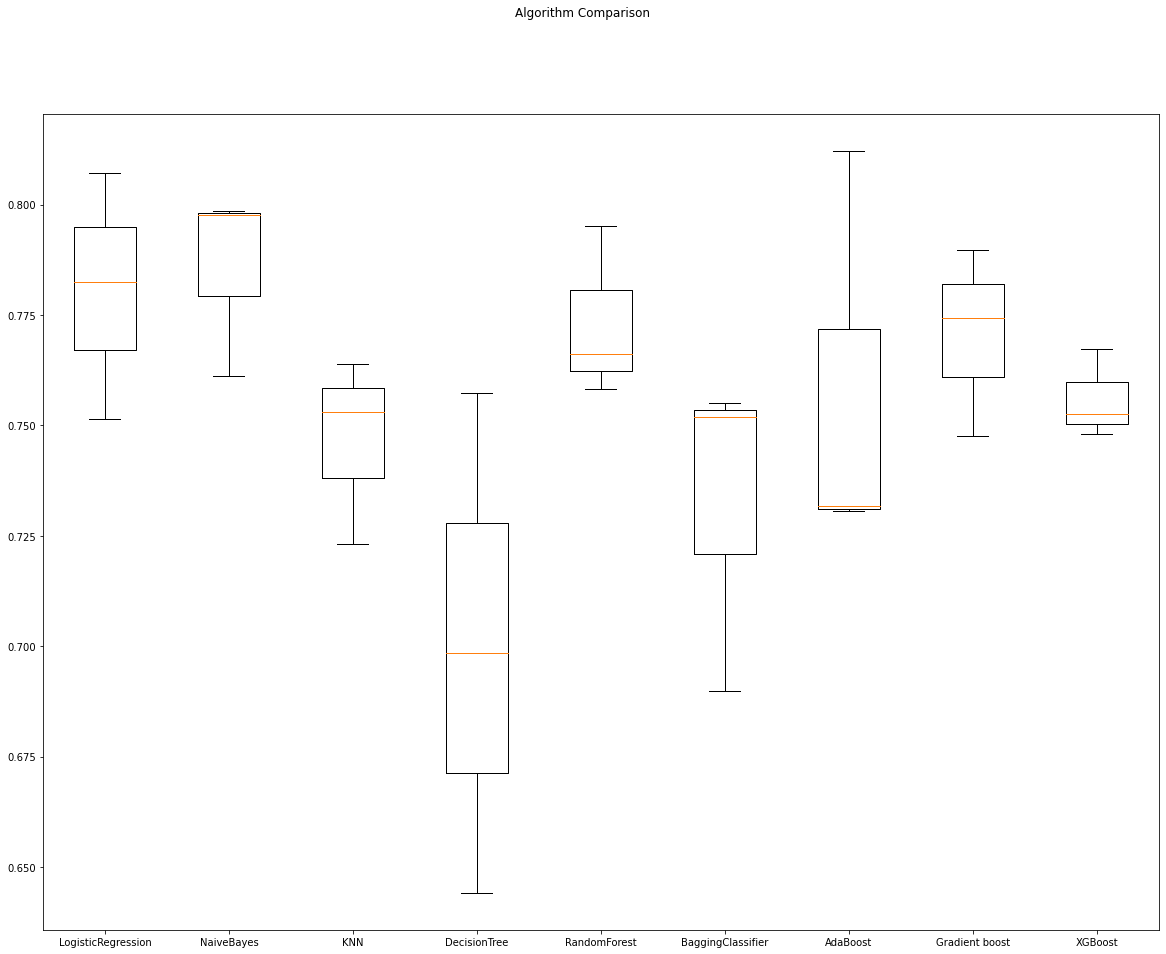

In [219]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(20,15))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### We can see we are getting better results with naivebayes and random forest so we can try to hyper parameter tune these 2

## Lets fit test data

In [220]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [221]:
loan_id=test.Loan_ID

In [222]:
loan_id.head()

0    LP001015
1    LP001022
2    LP001031
3    LP001035
4    LP001051
Name: Loan_ID, dtype: object

In [223]:
test.shape

(367, 12)

In [224]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [225]:
#As credit history is categorical collumn we need to replace 1 with yes and 0 with no
test.Credit_History.replace({1.:'Yes',0:'No'},inplace=True)

In [226]:
#Checking the replacement
test.Credit_History.unique()

array(['Yes', nan, 'No'], dtype=object)

In [227]:
#Also we can drop loan id as its unique value
test.drop('Loan_ID',inplace=True,axis=1)

In [228]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,Yes,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,Yes,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,Yes,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,Yes,Urban


In [229]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [230]:
test['ApplicantIncome'].dtype!='O'

True

In [231]:
def fill_na(df,col):
    if df[col].dtype=='O':
        most_fre=df[col].mode()[0]
        df[col].fillna(most_fre,inplace=True)
    else:
        mean_value=df[col].mean()
        df[col].fillna(mean_value,inplace=True)
    return

In [232]:
test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [233]:
for col in test.columns:
    fill_na(test,col)

In [234]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [235]:
#One hot encoding for categorical columns
test_en=pd.get_dummies(test,drop_first=True)

In [236]:
test_en.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1,1,0,0,0,0,0,1,0,1
1,3076,1500,126.0,360.0,1,1,1,0,0,0,0,1,0,1
2,5000,1800,208.0,360.0,1,1,0,1,0,0,0,1,0,1
3,2340,2546,100.0,360.0,1,1,0,1,0,0,0,1,0,1
4,3276,0,78.0,360.0,1,0,0,0,0,1,0,1,0,1


In [237]:
#Standard scaling
test_sc=sc.fit_transform(test_en)

In [238]:
#convert to dataframe
test_f=pd.DataFrame(test_sc,columns=test_en.columns)

In [239]:
test_f.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.429368,0.270603,0.485479,0.758358,-0.433246,-0.437674,-0.349749,-0.544812,-0.334845,0.437674,-0.679817,1.273353
1,-0.352692,-0.029848,-0.166482,0.270603,0.485479,0.758358,2.308156,-0.437674,-0.349749,-0.544812,-0.334845,0.437674,-0.679817,1.273353
2,0.039641,0.098849,1.180807,0.270603,0.485479,0.758358,-0.433246,2.284806,-0.349749,-0.544812,-0.334845,0.437674,-0.679817,1.273353
3,-0.502774,0.418877,-0.593671,0.270603,0.485479,0.758358,-0.433246,2.284806,-0.349749,-0.544812,-0.334845,0.437674,-0.679817,1.273353
4,-0.311909,-0.673335,-0.955139,0.270603,0.485479,-1.318638,-0.433246,-0.437674,-0.349749,1.835497,-0.334845,0.437674,-0.679817,1.273353


In [240]:
#predict the value of target
nb=GaussianNB().fit(x_sc, out)

In [241]:
ypred=nb.predict(test_f)

In [242]:
ypred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [243]:
type(loan_id)

pandas.core.series.Series

In [244]:
type(pd.Series(ypred))

pandas.core.series.Series

In [245]:
f_result=loan_id.to_frame(name='Loan_ID').join(pd.Series(ypred).to_frame(name='Loan_Status'))

In [246]:
f_result.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [247]:
f_result.shape

(367, 2)

In [248]:
f_result.isnull().sum()

Loan_ID        0
Loan_Status    0
dtype: int64

In [249]:
f_result['Loan_Status'].replace({1:'Y',0:'N'},inplace=True)

In [250]:
f_result.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [251]:
f_result.to_csv('result_loanstatuapred1.csv',index=False)